In [53]:
#importing the necessary libraries for plotting
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

#importing numpy and panda
import numpy as np
import pandas as pd

#librariers to build models and checking accuracy
import sklearn
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from statsmodels.formula.api import ols

#library to split data
from sklearn.model_selection import train_test_split

#library for EDA
from scipy.stats import zscore

#Library for saving data
import pickle

#library for GridSearchCV 
from sklearn.model_selection import GridSearchCV

#library for error detection in regression models
from sklearn.metrics import mean_squared_error, mean_absolute_error

#libraries for regularisation
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV

import warnings
warnings.filterwarnings('ignore')

In [122]:
#reading dataframe
df=pd.read_excel('Data_Train.xlsx')

#show all columns in dataframe
pd.set_option('display.max_columns', None)

df.head(20)

FileNotFoundError: [Errno 2] No such file or directory: 'Data_Train.xlsx'

df is the dataframe, where the data is stored

# Data Descritption

The data contains the various flights data, which are the Airline name,Date of Journey,Source,Destination,Route,Departure Time,Arrival Time,Duration,Total Stops,Additional Info


the Date_of_Journey and Duration needs to be broken down into more usable formats


# Statistical data analysis

In [55]:
df.describe(include="all")

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
count,10683,10683,10683,10683,10682,10683,10683,10683,10682,10683,10683.000000
unique,12,44,5,6,128,222,1343,368,5,10,NaN
top,Jet Airways,18/05/2019,Delhi,Cochin,DEL → BOM → COK,18:55,19:00,2h 50m,1 stop,No info,NaN
freq,3849,504,4537,4537,2376,233,423,550,5625,8345,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9087.064121
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4611.359167
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1759.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5277.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8372.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12373.000000


Observations

1.In continous datas, outliers are less

2.The unique values are also less, so not dropping any column

3.There are 10463 columns which might reduce depending on EDA

4.There are both continous and categorical datas


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


The dataframe has 11 columns

Here our label is Price and others are features. Since the target is continous data we would be using regression modelling

# Graphical data analysis

In [57]:
df=pd.read_excel('Data_Train.xlsx')

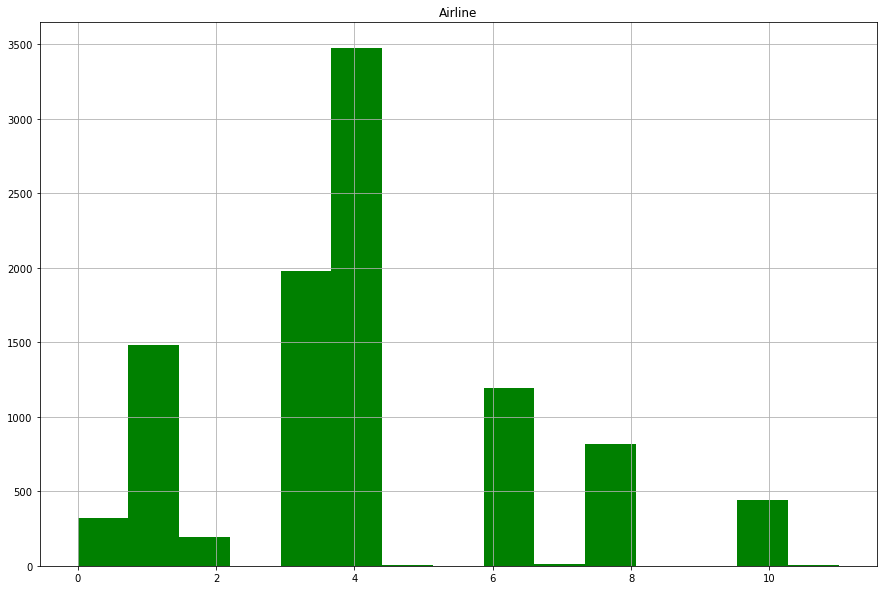

Text(0.5, 1.0, 'Airline')

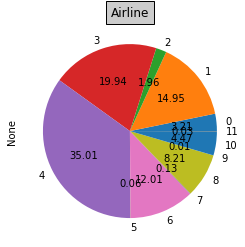

In [121]:
#Airline
df['Airline'].hist(figsize=(15,10),bins = 15,color='g')
plt.title("Airline")
plt.show()




Jet Airways is the largest number of flights

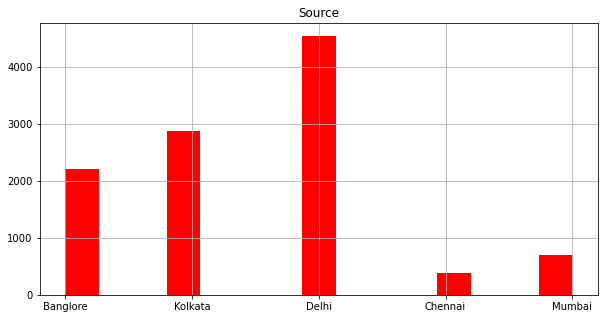

In [59]:
#Source
df['Source'].hist(figsize=(10,5),bins = 15,color='red')
plt.title("Source")
plt.show()

The largest number of source points is Delhi

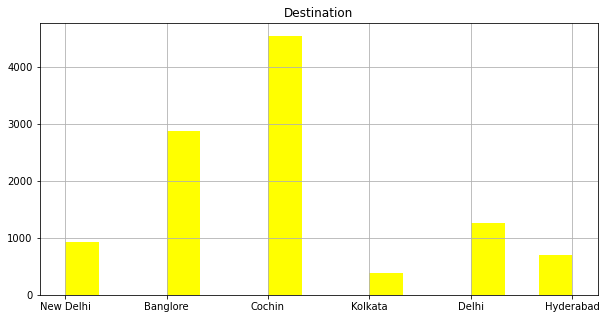

In [60]:
#Destination
df['Destination'].hist(figsize=(10,5),bins = 15,color='yellow')
plt.title("Destination")
plt.show()

The largest number of destination point is Cochin

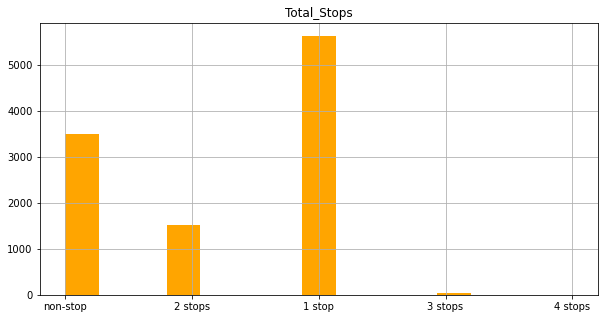

In [61]:
#Total_Stops
df['Total_Stops'].hist(figsize=(10,5),bins = 15,color='orange')
plt.title("Total_Stops")
plt.show()

The 1 stop flights are the gighest in number

# Data transformation and derivation of new attributes

In [62]:
#removing duplicate values
df.drop_duplicates(inplace=True)

In [63]:
#extracting Date_of_Journey into more usable format
df["Journey_day"] = pd.to_datetime(df["Date_of_Journey"], format="%d/%m/%Y").dt.day
df["Journey_month"] = pd.to_datetime(df["Date_of_Journey"], format = "%d/%m/%Y").dt.month

## Now we can drop Date_of_Journey as it is of no use
df.drop(["Date_of_Journey"], axis = 1, inplace = True)
df

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107,9,4
10679,Air India,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145,27,4
10680,Jet Airways,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229,27,4
10681,Vistara,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648,1,3


In [64]:
#extracting Dep_Time into more usable format

# Extracting Hours
df["DepartureHour"] = pd.to_datetime(df["Dep_Time"]).dt.hour

# Extracting Minutes
df["DepartureMin"] = pd.to_datetime(df["Dep_Time"]).dt.minute

# Now we can drop Dep_Time as it is of no use
df.drop(["Dep_Time"], axis = 1, inplace = True)

df

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,DepartureHour,DepartureMin
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,16,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,22:25,2h 30m,non-stop,No info,4107,9,4,19,55
10679,Air India,Kolkata,Banglore,CCU → BLR,23:20,2h 35m,non-stop,No info,4145,27,4,20,45
10680,Jet Airways,Banglore,Delhi,BLR → DEL,11:20,3h,non-stop,No info,7229,27,4,8,20
10681,Vistara,Banglore,New Delhi,BLR → DEL,14:10,2h 40m,non-stop,No info,12648,1,3,11,30


In [65]:
#Making arrival time into usable format
df["Arrival_hours"]=pd.to_datetime(df["Arrival_Time"]).dt.hour
df["Arrival_minutes"]=pd.to_datetime(df["Arrival_Time"]).dt.minute

# Now we can drop Dep_Time as it is of no use
df.drop(["Arrival_Time"], axis = 1, inplace = True)

df

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,DepartureHour,DepartureMin,Arrival_hours,Arrival_minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,2h 30m,non-stop,No info,4107,9,4,19,55,22,25
10679,Air India,Kolkata,Banglore,CCU → BLR,2h 35m,non-stop,No info,4145,27,4,20,45,23,20
10680,Jet Airways,Banglore,Delhi,BLR → DEL,3h,non-stop,No info,7229,27,4,8,20,11,20
10681,Vistara,Banglore,New Delhi,BLR → DEL,2h 40m,non-stop,No info,12648,1,3,11,30,14,10


In [66]:
#making Duration into usable format
dur = list(df["Duration"])

for i in range(len(dur)):
    #checking if the data has 2 parts both hours and minutes
    if len(dur[i].split()) != 2:    
        if "h" in dur[i]:
            #adding zero minutes where only hours are present
            dur[i] = dur[i].strip() + " 0m"   
        else:
            #adding zero hours where only minutes is present
            dur[i] = "0h " + dur[i]           



In [67]:
dur_hours = []
dur_mins = []

for i in range(len(dur)):
    # Extract hours from duration
    dur_hours.append(int(dur[i].split(sep = "h")[0])) 
    
    # Extract minutes from duration
    dur_mins.append(int(dur[i].split(sep = "m")[0].split()[-1]))   

In [68]:
dur_hours

[2,
 7,
 19,
 5,
 4,
 2,
 15,
 21,
 25,
 7,
 13,
 2,
 2,
 12,
 2,
 26,
 4,
 22,
 23,
 20,
 5,
 15,
 2,
 2,
 13,
 15,
 5,
 5,
 2,
 2,
 2,
 13,
 2,
 22,
 5,
 10,
 5,
 2,
 6,
 11,
 11,
 8,
 22,
 2,
 12,
 2,
 2,
 2,
 16,
 19,
 3,
 25,
 2,
 3,
 2,
 16,
 15,
 2,
 6,
 25,
 12,
 27,
 10,
 10,
 2,
 10,
 2,
 1,
 13,
 2,
 1,
 26,
 7,
 13,
 5,
 2,
 2,
 1,
 19,
 2,
 14,
 2,
 22,
 9,
 10,
 21,
 5,
 18,
 12,
 18,
 9,
 11,
 17,
 13,
 2,
 2,
 2,
 3,
 1,
 16,
 12,
 12,
 7,
 24,
 2,
 8,
 7,
 14,
 30,
 19,
 15,
 2,
 12,
 10,
 5,
 15,
 16,
 10,
 2,
 11,
 2,
 1,
 14,
 20,
 2,
 23,
 18,
 16,
 2,
 2,
 8,
 16,
 3,
 2,
 14,
 23,
 21,
 21,
 2,
 10,
 8,
 8,
 5,
 8,
 11,
 27,
 8,
 20,
 4,
 8,
 2,
 24,
 2,
 12,
 12,
 23,
 16,
 2,
 25,
 26,
 28,
 2,
 25,
 9,
 4,
 15,
 1,
 2,
 9,
 2,
 22,
 3,
 11,
 9,
 12,
 17,
 5,
 25,
 20,
 13,
 18,
 1,
 9,
 16,
 2,
 4,
 5,
 24,
 2,
 2,
 4,
 25,
 6,
 3,
 18,
 2,
 12,
 19,
 2,
 8,
 9,
 2,
 3,
 2,
 12,
 2,
 9,
 2,
 9,
 29,
 2,
 5,
 9,
 10,
 4,
 1,
 11,
 2,
 2,
 10,
 2,
 10,
 1,
 9,
 

In [69]:
dur_mins

[50,
 25,
 0,
 25,
 45,
 25,
 30,
 5,
 30,
 50,
 15,
 35,
 15,
 10,
 35,
 35,
 30,
 35,
 0,
 35,
 10,
 20,
 50,
 55,
 20,
 10,
 45,
 55,
 50,
 15,
 15,
 25,
 50,
 0,
 30,
 25,
 15,
 30,
 15,
 55,
 5,
 30,
 5,
 45,
 0,
 50,
 50,
 15,
 5,
 55,
 15,
 20,
 50,
 0,
 50,
 15,
 5,
 15,
 30,
 5,
 25,
 20,
 15,
 30,
 15,
 25,
 50,
 30,
 20,
 15,
 25,
 30,
 20,
 30,
 0,
 45,
 50,
 30,
 5,
 15,
 50,
 40,
 10,
 35,
 0,
 20,
 25,
 45,
 20,
 0,
 15,
 5,
 30,
 20,
 35,
 25,
 40,
 0,
 25,
 35,
 20,
 15,
 30,
 0,
 45,
 55,
 10,
 30,
 20,
 55,
 0,
 55,
 45,
 10,
 55,
 25,
 5,
 10,
 40,
 55,
 40,
 25,
 5,
 15,
 25,
 10,
 10,
 0,
 50,
 20,
 0,
 55,
 10,
 45,
 0,
 50,
 40,
 15,
 45,
 50,
 0,
 15,
 25,
 35,
 50,
 35,
 25,
 55,
 50,
 10,
 20,
 25,
 50,
 20,
 15,
 35,
 35,
 50,
 45,
 10,
 50,
 45,
 15,
 20,
 30,
 25,
 30,
 40,
 10,
 45,
 35,
 5,
 30,
 30,
 10,
 35,
 5,
 50,
 0,
 0,
 25,
 30,
 30,
 0,
 20,
 30,
 45,
 10,
 35,
 45,
 55,
 35,
 20,
 5,
 40,
 15,
 10,
 25,
 50,
 25,
 15,
 50,
 15,
 50,
 20,
 55,
 

In [70]:
#adding the columns to dataframe
df["Duration_in_hours"] = dur_hours
df["Duration_in_mins"] = dur_mins

#dropping Duration column since its split now 
df=df.drop(["Duration"],axis=1)
df

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,DepartureHour,DepartureMin,Arrival_hours,Arrival_minutes,Duration_in_hours,Duration_in_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,non-stop,No info,4107,9,4,19,55,22,25,2,30
10679,Air India,Kolkata,Banglore,CCU → BLR,non-stop,No info,4145,27,4,20,45,23,20,2,35
10680,Jet Airways,Banglore,Delhi,BLR → DEL,non-stop,No info,7229,27,4,8,20,11,20,3,0
10681,Vistara,Banglore,New Delhi,BLR → DEL,non-stop,No info,12648,1,3,11,30,14,10,2,40


In [71]:
#counting route
df["Route"].value_counts()

DEL → BOM → COK                      2376
BLR → DEL                            1536
CCU → BOM → BLR                       979
CCU → BLR                             724
BOM → HYD                             621
                                     ... 
CCU → IXB → DEL → BLR                   1
CCU → VTZ → BLR                         1
BLR → BOM → IXC → DEL                   1
BOM → COK → MAA → HYD                   1
BLR → CCU → BBI → HYD → VGA → DEL       1
Name: Route, Length: 128, dtype: int64

In [72]:
#checking null values again
df.isnull().sum()

Airline              0
Source               0
Destination          0
Route                1
Total_Stops          1
Additional_Info      0
Price                0
Journey_day          0
Journey_month        0
DepartureHour        0
DepartureMin         0
Arrival_hours        0
Arrival_minutes      0
Duration_in_hours    0
Duration_in_mins     0
dtype: int64

Null values are present in departure time and the total stops, which need to be filled

# EDA

# 1.Dealing with continous data

Checking skewness and removing outliers

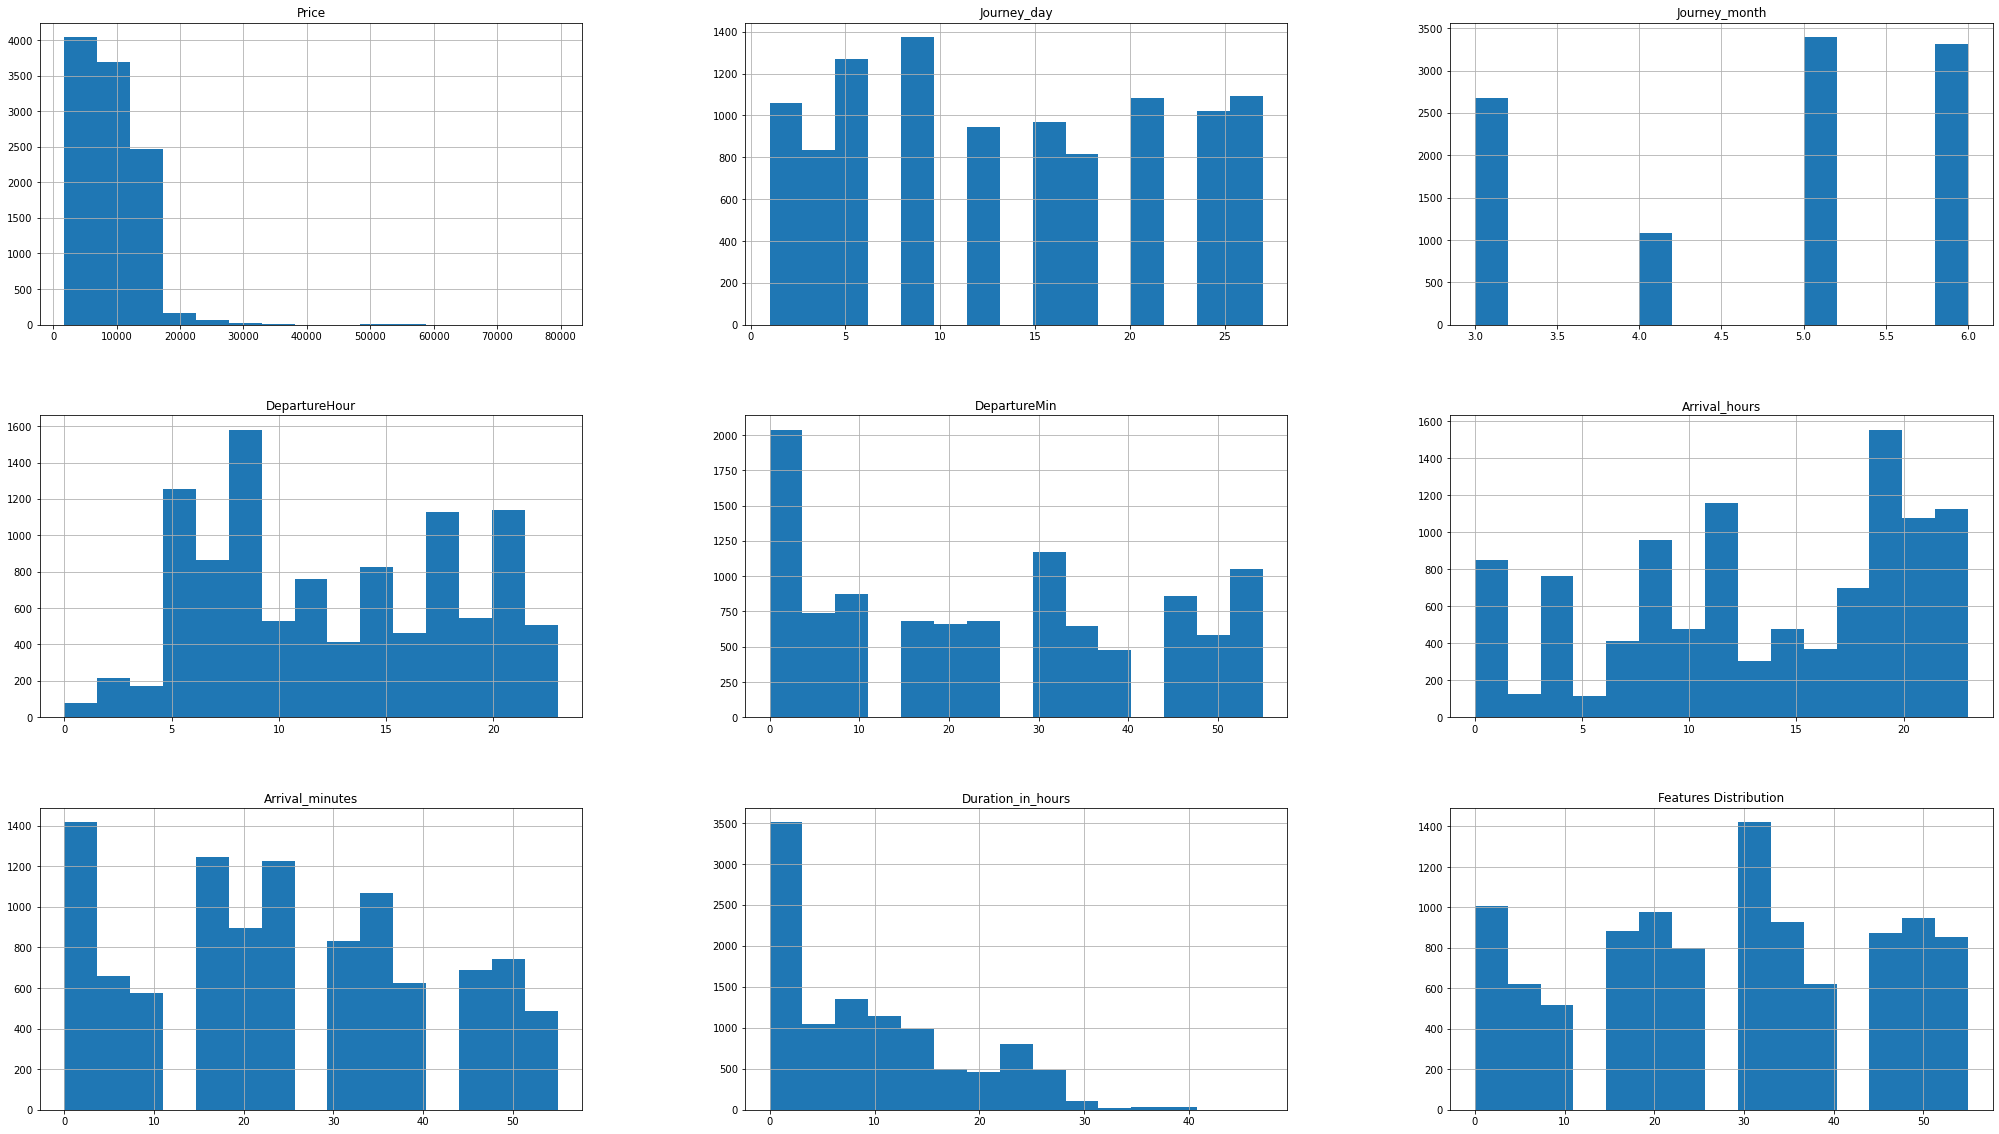

In [73]:
#checking for outliers
df.hist(figsize=(35,20),bins = 15)
plt.title("Features Distribution")
plt.show()


In [74]:
#finding continous columns
df.select_dtypes(include=["number"]).columns

Index(['Price', 'Journey_day', 'Journey_month', 'DepartureHour',
       'DepartureMin', 'Arrival_hours', 'Arrival_minutes', 'Duration_in_hours',
       'Duration_in_mins'],
      dtype='object')

In [75]:
# reducing skewness
x = df[['Journey_day', 'Journey_month', 'DepartureHour','DepartureMin', 'Arrival_hours', 'Arrival_minutes', 'Duration_in_hours','Duration_in_mins']].copy()
x.skew()


Journey_day          0.124807
Journey_month       -0.377621
DepartureHour        0.108458
DepartureMin         0.171091
Arrival_hours       -0.378815
Arrival_minutes      0.110803
Duration_in_hours    0.892296
Duration_in_mins    -0.086036
dtype: float64

In [76]:
#Using zscore
import numpy as np
from scipy.stats import zscore

z=np.abs(zscore(x))
threshold=1
df_new=df[(z<2).all(axis=1)]

print("columns before applying zscore: ",len(df))
print("columns after applying zscore: ",len(df_new))

columns before applying zscore:  10463
columns after applying zscore:  9923


60 columns were removed as they were outliers

In [77]:
df=df_new
df["Price"]

0         3897
1         7662
2        13882
3         6218
4        13302
         ...  
10678     4107
10679     4145
10680     7229
10681    12648
10682    11753
Name: Price, Length: 9923, dtype: int64

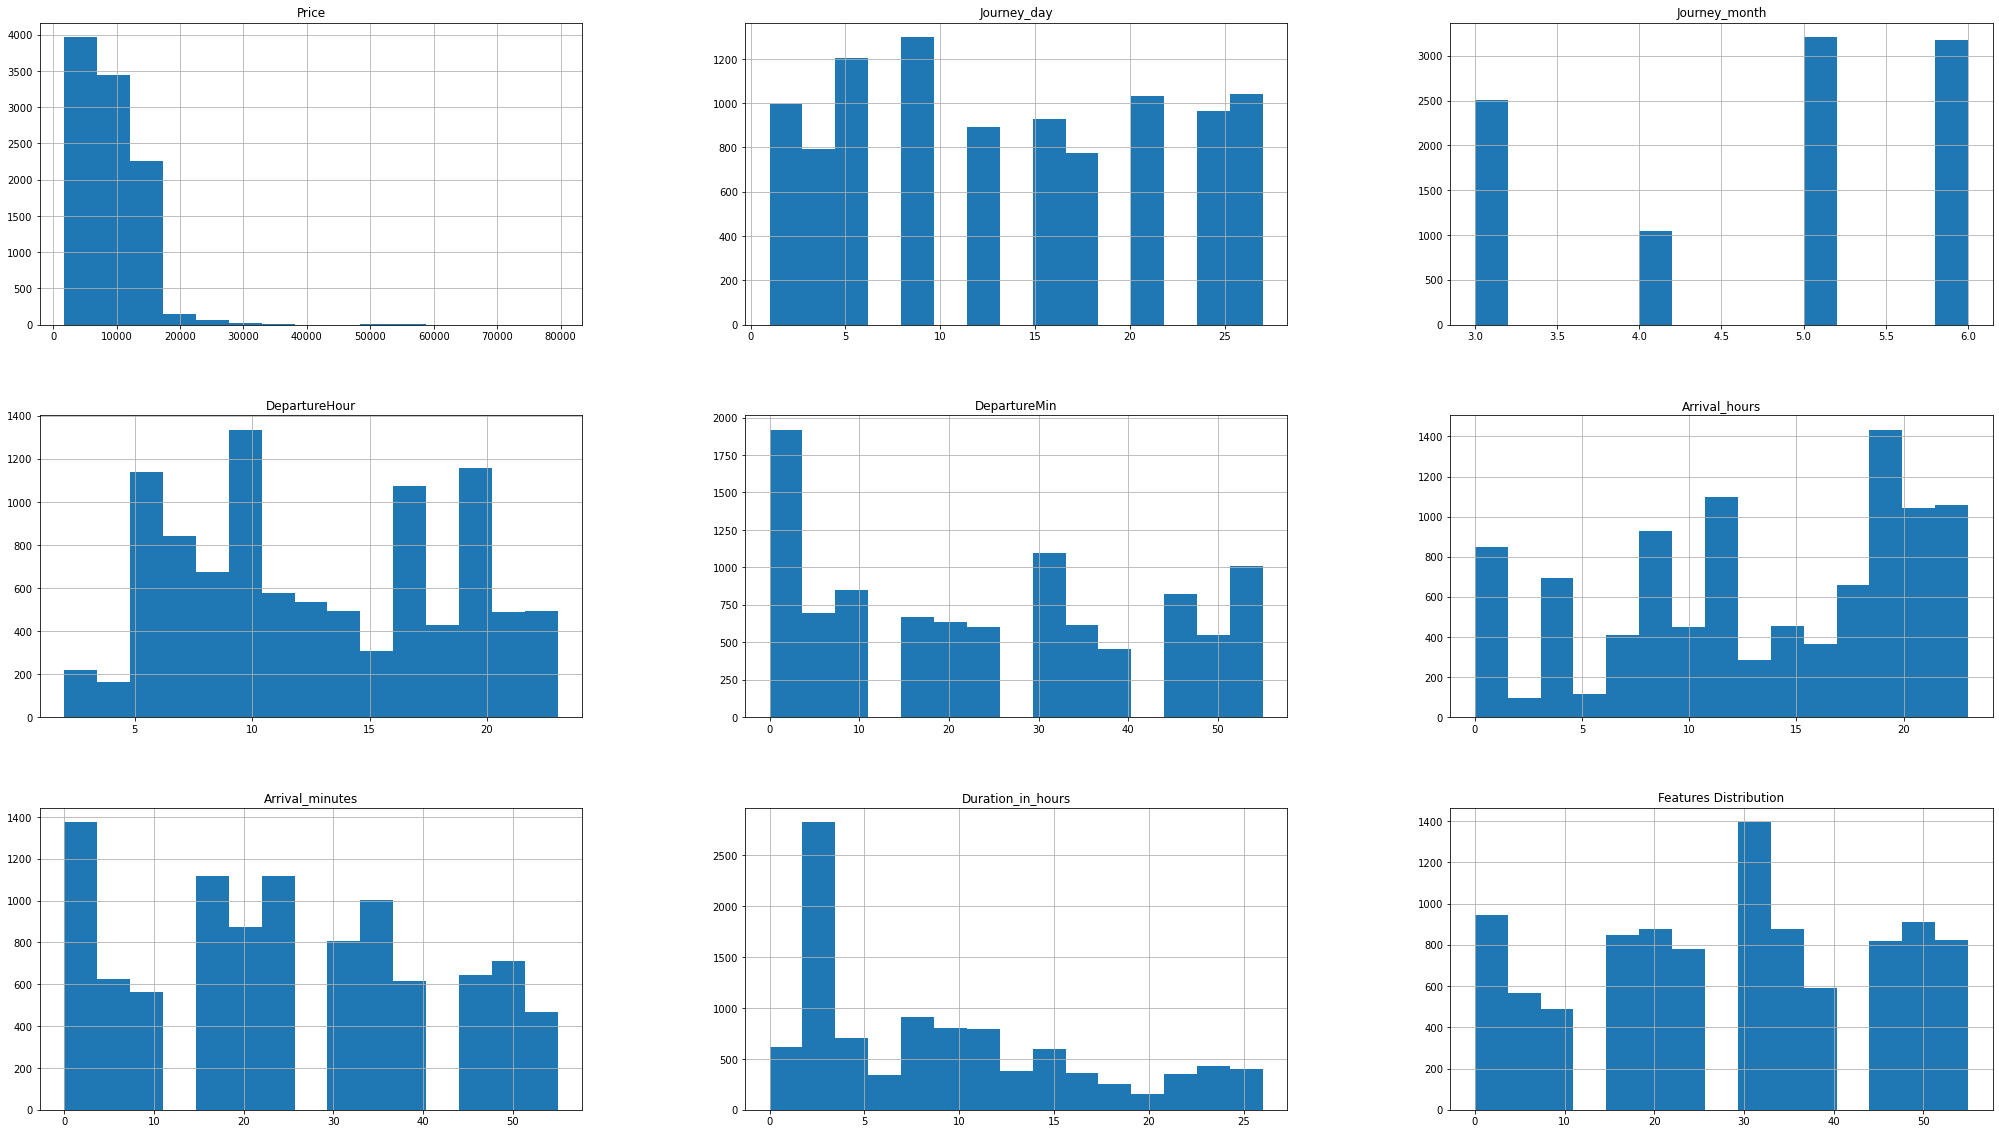

In [78]:
#checking for outliers
df.hist(figsize=(35,20),bins = 15)
plt.title("Features Distribution")
plt.show()


Observations:

1.Jounrey days can be seen where maximum are between 2nd to 6th, then from 8th to 9th, then from 12th to 13th

2.Journey months maximum is on May and June

3.9:00am is the maximum departure (hour:minute)

4.7:00pm is the maximum arrivals (hour:minute)

5.Maximum of the flights took only within one hour to fly, and very few flights after 28 hours

Dealt with all continous data

In [79]:
df.describe()

,Price,Journey_day,Journey_month,DepartureHour,DepartureMin,Arrival_hours,Arrival_minutes,Duration_in_hours,Duration_in_mins
count,9923.000000,9923.000000,9923.000000,9923.000000,9923.000000,9923.000000,9923.000000,9923.000000,9923.000000
mean,8912.403205,13.485236,4.710168,12.617958,24.441701,13.338305,24.720347,9.155296,28.346770
std,4630.229383,8.463771,1.161797,5.665459,18.846517,6.870628,16.653926,7.352539,16.848279
min,1759.000000,1.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5192.000000,6.000000,3.000000,8.000000,5.000000,8.000000,10.000000,2.000000,15.000000
50%,8016.000000,12.000000,5.000000,12.000000,25.000000,14.000000,25.000000,7.000000,30.000000
75%,12192.000000,21.000000,6.000000,18.000000,40.000000,19.000000,35.000000,14.000000,45.000000
max,79512.000000,27.000000,6.000000,23.000000,55.000000,23.000000,55.000000,26.000000,55.000000


# 2. Dealing with categorical data

In [80]:
#checking null values again
df.isnull().sum()

Airline              0
Source               0
Destination          0
Route                1
Total_Stops          1
Additional_Info      0
Price                0
Journey_day          0
Journey_month        0
DepartureHour        0
DepartureMin         0
Arrival_hours        0
Arrival_minutes      0
Duration_in_hours    0
Duration_in_mins     0
dtype: int64

In [81]:
#finding the categorical datas
df.select_dtypes(exclude=["number"]).columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Total_Stops',
       'Additional_Info'],
      dtype='object')

In [82]:
#counting number of route, to add mode or drop column
len(df["Route"].value_counts())

118

In [83]:
#removing null values
df["Route"].fillna(df["Route"].mode()[0],inplace=True)

#removing null values in Total_Stops
df["Total_Stops"].fillna(df["Total_Stops"].mode()[0],inplace=True)

In [84]:
#checking null values again
df.isnull().sum()

Airline              0
Source               0
Destination          0
Route                0
Total_Stops          0
Additional_Info      0
Price                0
Journey_day          0
Journey_month        0
DepartureHour        0
DepartureMin         0
Arrival_hours        0
Arrival_minutes      0
Duration_in_hours    0
Duration_in_mins     0
dtype: int64

In [85]:
#encoding all categorical columns on 'Airline', 'Source', 'Destination', 'Route', 'Total_Stops','Additional_Info'
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

df['Airline']= label_encoder.fit_transform(df['Airline'])
df['Source']= label_encoder.fit_transform(df['Source'])
df['Destination']= label_encoder.fit_transform(df['Destination'])
df['Route']= label_encoder.fit_transform(df['Route'])
df['Total_Stops']= label_encoder.fit_transform(df['Total_Stops'])
df['Additional_Info']= label_encoder.fit_transform(df['Additional_Info'])

# splitting label and feature

In [86]:
x=df.drop(["Price"],axis=1)
y=df["Price"]

# Data standardisation

In [87]:
#scaling
scalar=StandardScaler()
x_scaled=scalar.fit_transform(x)

# Feature Selection

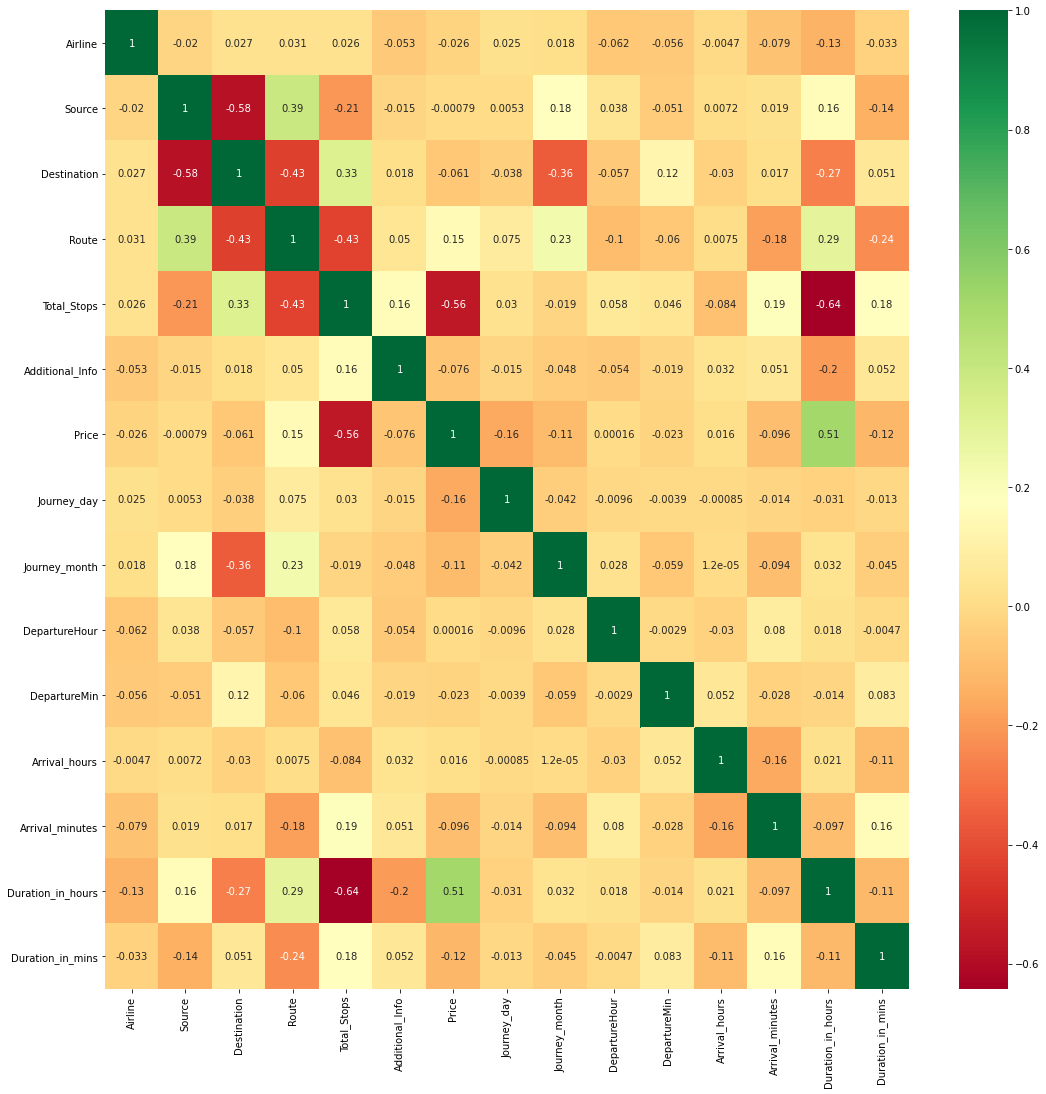

In [88]:
#heatmap
plt.figure(figsize = (18,18))
sns.heatmap(df.corr(), annot = True, cmap = "RdYlGn")
plt.show()

In [89]:
#checking multicollinearity

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


vif=pd.DataFrame()
vif["quality"]=[variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]
vif["feature"]=x.columns
vif

,quality,feature
0,1.046505,Airline
1,1.607871,Source
2,1.938905,Destination
3,1.625215,Route
4,2.049370,Total_Stops
5,1.091961,Additional_Info
6,1.021434,Journey_day
7,1.218154,Journey_month
8,1.040120,DepartureHour
9,1.034633,DepartureMin


Multicollinearity is not present much among the features

In [90]:
df

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,DepartureHour,DepartureMin,Arrival_hours,Arrival_minutes,Duration_in_hours,Duration_in_mins
0,3,0,5,14,3,8,3897,24,3,22,20,1,10,2,50
1,1,3,0,75,1,8,7662,1,5,5,50,13,15,7,25
2,4,2,1,108,1,8,13882,9,6,9,25,4,25,19,0
3,3,3,0,81,0,8,6218,12,5,18,5,23,30,5,25
4,3,0,5,25,0,8,13302,1,3,16,50,21,35,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,3,0,56,3,8,4107,9,4,19,55,22,25,2,30
10679,1,3,0,56,3,8,4145,27,4,20,45,23,20,2,35
10680,4,0,2,14,3,8,7229,27,4,8,20,11,20,3,0
10681,10,0,5,14,3,8,12648,1,3,11,30,14,10,2,40


# Splitting data

In [91]:
#splitting data
x_train, x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=10)

In [92]:
y_train.head()

9062    15029
212      9646
4551     4804
7874    12476
6973    15187
Name: Price, dtype: int64

# Finding best random state

In [93]:

maxr2=0
maxRS=0

for i in range(1,200):
    x_train, x_test,y_train, y_test=train_test_split(x_scaled,y,test_size=.25,random_state=i)
    LR=LinearRegression()
    LR.fit(x_train,y_train)
    predrf=LR.predict(x_test)
    r2=r2_score(y_test,predrf)
    if r2>maxr2:
        maxr2=r2
        maxRS=i

print("Best r2 score is", maxr2,"on Random State",maxRS)

Best r2 score is 0.4614190234198259 on Random State 143


In [94]:
x_train, x_test,y_train, y_test=train_test_split(x_scaled,y,test_size=.25,random_state=199)

# Modelling

In [95]:
dt=DecisionTreeRegressor()
dt.fit(x_train,y_train)
predlr=dt.predict(x_test)
print("r2 score of DecisionTreeRegressor model is",r2_score(y_test,predlr))

r2 score of DecisionTreeRegressor model is 0.8516720660753256


In [96]:
#Random forest regressor
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
predlr=rf.predict(x_test)
print("r2 score of RandomForestRegressor model is",r2_score(y_test,predlr))

r2 score of RandomForestRegressor model is 0.8968020679513694


In [97]:
#Linear Regression
from sklearn.linear_model import LinearRegression

LR=LinearRegression()
LR.fit(x_train,y_train)
predlr=LR.predict(x_test)
print("r2 score of LinearRegression model is",r2_score(y_test,predlr))

r2 score of LinearRegression model is 0.40959715684255416


In [98]:
#cross validation
#Finding overfitting
from sklearn.model_selection import cross_val_score
from sklearn import linear_model
import statsmodels.api

scr1=cross_val_score(LR,x,y,cv=5)
print("Cross validation score of Linear Regression model :", scr1.mean())

scr2=cross_val_score(dt,x,y,cv=5)
print("Cross validation score of Decision Tree model :", scr2.mean())

scr3=cross_val_score(rf,x,y,cv=5)
print("Cross validation score of Random Forest model :", scr3.mean())


Cross validation score of Linear Regression model : 0.40476356898859933
Cross validation score of Decision Tree model : 0.7816702468988721
Cross validation score of Random Forest model : 0.8812594141622749


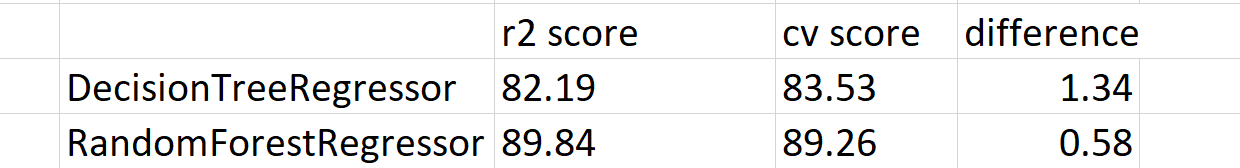

The least difference is seen in Random Forest Regressor model and hence we will be using it for our modelling

# hyperparameter tuning and grid search cv

In [99]:
#RandomForestRegressor
paramters={'n_estimators':[2,4,5,6,8],
           'min_samples_split':[2,3,4],
           'min_samples_leaf':[2,3,4],
           'max_leaf_nodes':[2,3,4],
           'max_features':['auto','sqrt','log2'],   
}

In [100]:
GCV=GridSearchCV(RandomForestRegressor(),paramters,cv=6)

In [101]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=6, estimator=RandomForestRegressor(),
             param_grid={'max_features': ['auto', 'sqrt', 'log2'],
                         'max_leaf_nodes': [2, 3, 4],
                         'min_samples_leaf': [2, 3, 4],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [2, 4, 5, 6, 8]})

In [102]:
GCV.best_params_

{'max_features': 'auto',
 'max_leaf_nodes': 4,
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'n_estimators': 2}

In [103]:
mod=RandomForestRegressor(n_estimators=8,max_leaf_nodes=4,min_samples_leaf=4,min_samples_split=4,max_features='auto')

In [104]:
mod.fit(x_train,y_train)
pred=mod.predict(x_test)
print(r2_score(y_test,pred)*100)

48.759772192103824


In [105]:
randomforest=RandomForestRegressor()
randomforest.fit(x_train,y_train)

RandomForestRegressor()

# Saving of model

In [106]:
#saving RandomForestRegressor model
RandomForestRegressor_model=RandomForestRegressor()
RandomForestRegressor_model.fit(x_train,y_train)

filename='finalized_model.pickle'
pickle.dump(RandomForestRegressor_model,open(filename,'wb'))

In [107]:
#Adjusted R2
RandomForestRegressor_model.score(x_train,y_train)

0.9774060827701295

# Prediction

In [108]:
#reading dataframe
x_test=pd.read_excel('Test_set.xlsx')
len(x_test)

2671

In [109]:
#reading dataframe
x_test=pd.read_excel('Test_set.xlsx')


#removing duplicate values
x_test.drop_duplicates(inplace=True)

#extracting Date_of_Journey into more usable format
x_test["Journey_day"] = pd.to_datetime(x_test["Date_of_Journey"], format="%d/%m/%Y").dt.day
x_test["Journey_month"] = pd.to_datetime(x_test["Date_of_Journey"], format = "%d/%m/%Y").dt.month

## Now we can drop Date_of_Journey as it is of no use
x_test.drop(["Date_of_Journey"], axis = 1, inplace = True)

# Extracting Hours
x_test["DepartureHour"] = pd.to_datetime(x_test["Dep_Time"]).dt.hour

# Extracting Minutes
x_test["DepartureMin"] = pd.to_datetime(x_test["Dep_Time"]).dt.minute

# Now we can drop Dep_Time as it is of no use
x_test.drop(["Dep_Time"], axis = 1, inplace = True)

#Making arrival time into usable format
x_test["Arrival_hours"]=pd.to_datetime(x_test["Arrival_Time"]).dt.hour
x_test["Arrival_minutes"]=pd.to_datetime(x_test["Arrival_Time"]).dt.minute

# Now we can drop Dep_Time as it is of no use
x_test.drop(["Arrival_Time"], axis = 1, inplace = True)

#making Duration into usable format
dur = list(x_test["Duration"])

for i in range(len(dur)):
    #checking if the data has 2 parts both hours and minutes
    if len(dur[i].split()) != 2:    
        if "h" in dur[i]:
            #adding zero minutes where only hours are present
            dur[i] = dur[i].strip() + " 0m"   
        else:
            #adding zero hours where only minutes is present
            dur[i] = "0h " + dur[i]           

            
dur_hours = []
dur_mins = []

for i in range(len(dur)):
    # Extract hours from duration
    dur_hours.append(int(dur[i].split(sep = "h")[0])) 
    
    # Extract minutes from duration
    dur_mins.append(int(dur[i].split(sep = "m")[0].split()[-1]))  
    
#adding the columns to dataframe
x_test["Duration_in_hours"] = dur_hours
x_test["Duration_in_mins"] = dur_mins

#dropping Duration column since its split now 
x_test=x_test.drop(["Duration"],axis=1)

#Using zscore
import numpy as np
from scipy.stats import zscore

x_test_num=x_test[['Journey_day', 'Journey_month', 'DepartureHour','DepartureMin', 'Arrival_hours', 'Arrival_minutes', 'Duration_in_hours','Duration_in_mins']].copy()
z=np.abs(zscore(x_test_num))
threshold=1
x_testnew=x_test[(z<2).all(axis=1)]

x_test=x_testnew

#removing null values
x_test["Route"].fillna(x_test["Route"].mode()[0],inplace=True)

#removing null values in Total_Stops
x_test["Total_Stops"].fillna(x_test["Total_Stops"].mode()[0],inplace=True)

#encoding all categorical columns on 'Airline', 'Source', 'Destination', 'Route', 'Total_Stops','Additional_Info'
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

x_test['Airline']= label_encoder.fit_transform(x_test['Airline'])
x_test['Source']= label_encoder.fit_transform(x_test['Source'])
x_test['Destination']= label_encoder.fit_transform(x_test['Destination'])
x_test['Route']= label_encoder.fit_transform(x_test['Route'])
x_test['Total_Stops']= label_encoder.fit_transform(x_test['Total_Stops'])
x_test['Additional_Info']= label_encoder.fit_transform(x_test['Additional_Info'])

lasscv=LassoCV(alphas=None, max_iter=1000,normalize=True)
lasscv.fit(x_train,y_train)

len(x_test)

2506

In [110]:
y_pred=RandomForestRegressor_model.predict(x_test)

In [111]:
y_pred

array([18629.51, 18591.19, 17265.1 , ..., 18629.51, 19242.73, 18629.51])

# storing output in dataframe and file

In [112]:
y_test=pd.DataFrame(y_pred)
y_test

,0
0,18629.51
1,18591.19
2,17265.10
3,16848.23
4,15958.40
...,...
2501,19104.08
2502,18357.63
2503,18629.51
2504,19242.73


In [117]:
y_test.to_excel("output_testdata.xlsx", index = False)

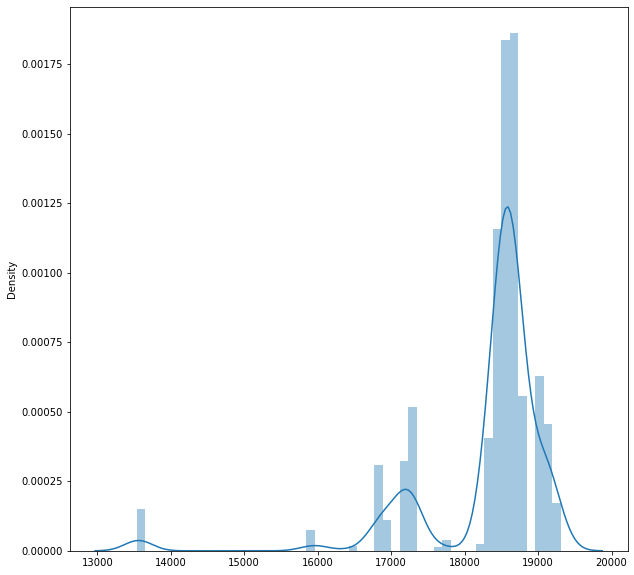

In [119]:
plt.figure(figsize = (10,10))
sns.distplot(y_pred)
plt.show()